<a href="https://colab.research.google.com/github/gustavolq/Bootcamp-DataScience-Alura/blob/main/Modulo_02/Projeto/Analise_Covid_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do COVID-19 em Santa Catarina**

[![linkedin](https://img.shields.io/badge/gustavoquadra-0077B5??style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/gustavoquadra/)
[<img src="https://img.shields.io/badge/gglquadra@gmail.com-EA4335?style=plastic-square&logo=Gmail&logoColor=white" />](mailto:gglquadra@gmail.com)

<p align="left">
  <img width="700" src="https://github.com/gustavolq/Bootcamp-DataScience-Alura/blob/main/Modulo_02/Outros/AnaliseDadosGif.gif?raw=true">
</p>

Olá! Meu nome é Gustavo Luiz de Quadra e seja muito bem-vindo ao meu projeto referente ao **Módulo 02 - Visualização de Dados com Seaborn e Matplotlib** do Bootcamp de Data Science Aplicada da [Alura](https://www.alura.com.br/)!

Caso você tenha interesse em verificar o que foi aprendido nesse segundo módulo, podes clicar [aqui](https://github.com/gustavolq/Bootcamp-DataScience-Alura/blob/main/Modulo_02/Aulas/Tratamento_Exploracao_Visualizacao_Dados.ipynb) para acessar as minhas anotações das aulas.

**Sumário do Projeto**

**1.** Introdução

**2.** Definição do Problema de Negócio

**3.** Preparação dos Dados

**4.** Análise Exploratória dos Dados

**5.** Criação de Hipóteses

**6.** Conclusão

**7.** Agradecimentos

## **1. Introdução**

O **COVID-19** é a doença causada por uma nova espécie de coronavírus, denominada **SARS-CoV-2** e pertence a uma família de vírus que já circulava no Brasil antes da pandemia e era responsável por grande parte dos resfriados comuns. A origem do vírus ainda está sendo estudada, mas é muito provável que ela teve origem em **Wuhan, China** através de morcegos no ano de 2019.

O COVID-19 possui **sintomas leves** na maioria dos casos (tosse, dor de garganta, coriza), mas **pode ser extremamente agressiva** (falta de ar) à uma minoria. Costuma ser mais **perigoso para idosos com mais de 60 anos e pessoas com doenças pré-existentes**.

Para a prevenção do COVID-19, é importante mantermos as **mãos higienizadas com alcool em gel, utilizarmos máscaras e evitarmos aglomerações**. E também, aliada as medidas de prevenção, felizmente, hoje (04/06/2021), **estamos em campanha de vacinação no mundo inteiro para vencermos essa pandemia!**

##**2. Definição do Problema de Negócio**

###**2.1 Objetivo do Projeto**

O objetivo principal do projeto será **realizar uma análise de dados** referente à diversas informações (idade, municipio, sexo, sintomas...) **de pacientes que foram confirmados com COVID-19 no estado de Santa Catarina no Brasil**, buscando responder questionamentos e formular hipóteses para os nossos dados.

###**2.2 Dados Utilizados**

A tabela de dados de pacientes confirmados com COVID-19 foi extraída do [Portal de Dados Abertos do Estado de Santa Catarina](http://dados.sc.gov.br/tr/dataset/covid-19-dados-anonimizados-de-casos-confirmados) em **04/06/2021** e sofreram um processo de manipulação para utilizarmos as seguintes informações :

**Dicionário dos Dados** :
- recuperados : Indicação de que o paciente foi recuperado
- data_inicio_sintomas : Data do inicio dos sintomas
- sintomas : Sintomas do paciente
- sexo : Sexo biológico do paciente
- municipio : Município de residência do paciente
- obito : Indicação de que o paciente veio a óbito
- idade : Idade do Paciente

**OBS :** Devido a limitação de armazenamento (25MB) de arquivos no GitHub, realizei a separação da tabela de dados em 5 arquivos menores que serão unidos na preparação dos dados.

##**3. Preparação dos Dados**

Para essa primeira etapa, iremos realizar a importação dos pacotes e dos dados que serão utilizados em nossa análise.

Os dados estão armazenados no meu repositório do GitHub e podem ser acessados clicando [aqui](https://github.com/gustavolq/Bootcamp-DataScience-Alura/tree/main/Modulo_02/Projeto/Dados).

###**3.1 Importação dos Pacotes**

Para a análise, iremos realizar a importação dos seguintes pacotes : 
- **pandas(pd) 1.1.5** : Pacote para carregamento e manipulação dos dados.
- **seaborn(sns) 0.11.1** : Pacote para visualização e criação de gráficos.
- **matplotlib.pyplot(plt) 3.2.2** : Pacote para visualização e criação de gráficos.

In [9]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set()

###**3.2 Importação dos Dados**

Os dados foram separados em 5 arquivos na minha máquina utilizando o comando ```split -l 195665 Todos-Confirmados-SC.csv``` (cada um com 195.665 linhas), com os seguintes nomes :
- **Todos-Confirmados-SC-1.csv** (possui os nomes das colunas)
- **Todos-Confirmados-SC-2.csv**
- **Todos-Confirmados-SC-3.csv**
- **Todos-Confirmados-SC-4.csv**
- **Todos-Confirmados-SC-5.csv**

Nesse primeiro momento, iremos realizar o carregamento desses dados e unir os mesmos em apenas uma tabela.

In [10]:
nomes_arquivos = ['Todos-Confirmados-SC-1.csv', 'Todos-Confirmados-SC-2.csv', 'Todos-Confirmados-SC-3.csv', 'Todos-Confirmados-SC-4.csv', 'Todos-Confirmados-SC-5.csv']
dados_SC = pd.DataFrame()

for index in range(len(nomes_arquivos)) :
  if index == 0 :
    tabela_adicionada = pd.read_csv(f'https://github.com/gustavolq/Bootcamp-DataScience-Alura/raw/main/Modulo_02/Projeto/Dados/{nomes_arquivos[index]}')
    columns = tabela_adicionada.columns
  else :
    tabela_adicionada = pd.read_csv(f'https://github.com/gustavolq/Bootcamp-DataScience-Alura/raw/main/Modulo_02/Projeto/Dados/{nomes_arquivos[index]}', header = None)
    tabela_adicionada.columns = columns
  dados_SC = dados_SC.append(tabela_adicionada, ignore_index = True)

dados_SC.drop(['data_coleta', 'comorbidades', 'raca', 'data_obito'], axis = 1, inplace = True)
del(tabela_adicionada)

Após realizarmos a união das nossas tabelas de dados, podemos verificar que a tabela final ```dados_SC``` possui **978.324 linhas** e **7 colunas**.

Abaixo, também podemos verificar as 5 primeiras linhas de nossa tabela.

In [11]:
print(f'A tabela de dados possui {dados_SC.shape[0]} linhas e {dados_SC.shape[1]} colunas.')
dados_SC.head()

A tabela de dados possui 978324 linhas e 7 colunas.


,recuperados,data_inicio_sintomas,sintomas,sexo,municipio,obito,idade
0,Sim,2020-11-21,Nao_Informado,Feminino,Florianopolis,Nao,66.0
1,Sim,2021-02-22,"TOSSE, DOR DE GARGANTA, FEBRE",Feminino,Sao Jose,Nao,29.0
2,Sim,2021-03-10,"TOSSE, DISPNEIA, DOR DE GARGANTA, FEBRE",Masculino,Joinville,Nao,24.0
3,Sim,2021-01-03,Nao_Informado,Masculino,Lages,Nao,37.0
4,Sim,2020-12-09,Nao_Informado,Feminino,Sao Jose,Nao,57.0


###**3.3 Criação de Colunas**

Para auxiliar em nossas análises, iremos realizar a criação de 2 novas colunas **```mes_inicio_sintomas```** e **```ano_inicio_sintomas```** referentes ao **mês** e **ano** dos primeiros sintomas.

In [12]:
dados_SC['data_inicio_sintomas'] = dados_SC['data_inicio_sintomas'].str[0:11]
dados_SC['data_inicio_sintomas'] = pd.to_datetime(dados_SC['data_inicio_sintomas'])
dados_SC.insert(2, 'mes_inicio_sintomas', dados_SC['data_inicio_sintomas'].dt.month)
dados_SC.insert(3, 'ano_inicio_sintomas', dados_SC['data_inicio_sintomas'].dt.year)

Outra alteração que realizaremos será a divisão das idades dos pacientes que foram confirmados com covid em grupos de idade, excluindo assim a coluna ```idade``` para trabalharmos apenas com os grupos criados, sendo eles : 
- Menor que 20
- 21-30
- 31-40
- 41-50
- 51-60
- 61-70
- 71-80
- Maior que 81

In [13]:
dados_SC.insert(9, 'idade_categoria', pd.cut(dados_SC['idade'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 121], labels = ['Menos que 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Maior que 81']))
dados_SC.drop('idade', axis = 1, inplace = True)

Após a realização dessa nova adição, podemos demonstrar novamente como a nossa tabela se encontra após as alterações.

Podemos verificar novamente as 5 primeiras linhas para validarmos se a inserção das novas colunas ```mes_inicio_sintomas```, ```ano_inicio_sintomas``` e ```idade_categoria``` ocorreram corretamente.

In [14]:
dados_SC.head()

,recuperados,data_inicio_sintomas,mes_inicio_sintomas,ano_inicio_sintomas,sintomas,sexo,municipio,obito,idade_categoria
0,Sim,2020-11-21,11,2020,Nao_Informado,Feminino,Florianopolis,Nao,61-70
1,Sim,2021-02-22,2,2021,"TOSSE, DOR DE GARGANTA, FEBRE",Feminino,Sao Jose,Nao,21-30
2,Sim,2021-03-10,3,2021,"TOSSE, DISPNEIA, DOR DE GARGANTA, FEBRE",Masculino,Joinville,Nao,21-30
3,Sim,2021-01-03,1,2021,Nao_Informado,Masculino,Lages,Nao,31-40
4,Sim,2020-12-09,12,2020,Nao_Informado,Feminino,Sao Jose,Nao,51-60


###**3.4 Criação de Tabelas**

Também iremos realizar criações de uma tabela referente à quantidade de cada sintoma para os que foram divulgados (muitos possuem valores **Nao_Informado** que realizarei à remoção para a criação dessa tabela)

Para a criação dessa tabela, iremos realizar a divisão dos dados em sintomas de pacientes que não foram à óbitos e sintomas de pacientes que foram à óbitos.

In [15]:
lista_sem_obito = []
[lista_sem_obito.extend(item) for item in dados_SC.query('sintomas != "Nao_Informado" and obito == "Nao"')['sintomas'].str.split(', ').values]
sintomas_sem_obito = pd.Series(lista_sem_obito)
sintomas_sem_obito = sintomas_sem_obito.str.title()
del lista_sem_obito

In [16]:
lista_com_obito = []
[lista_com_obito.extend(item) for item in dados_SC.query('sintomas != "Nao_Informado" and obito == "Sim"')['sintomas'].str.split(', ').values]
sintomas_com_obito = pd.Series(lista_com_obito)
sintomas_com_obito = sintomas_com_obito.str.title()
del lista_com_obito

In [17]:
dados_sintomas = pd.DataFrame(sintomas_sem_obito.value_counts(), columns=['Quantidade_Sem_Obito']).join(pd.DataFrame(sintomas_com_obito.value_counts(), columns = ['Quantidade_Com_Obito']))
dados_sintomas['Total'] = dados_sintomas['Quantidade_Sem_Obito'] + dados_sintomas['Quantidade_Com_Obito']
dados_sintomas.insert(1, 'Sintoma_Sem_Obito_Por_Pessoa', round(dados_sintomas['Quantidade_Sem_Obito'] / len(dados_SC.query('sintomas != "Nao_Informado" and recuperados == "Sim"')) * 100, 2))
dados_sintomas.insert(3, 'Sintoma_Com_Obito_Por_Pessoa', round(dados_sintomas['Quantidade_Com_Obito'] / len(dados_SC.query('sintomas != "Nao_Informado" and obito == "Sim"')) * 100, 2))

In [18]:
dados_sintomas

,Quantidade_Sem_Obito,Sintoma_Sem_Obito_Por_Pessoa,Quantidade_Com_Obito,Sintoma_Com_Obito_Por_Pessoa,Total
Tosse,434560,65.54,10531,71.38,445091
Febre,315201,47.54,8295,56.22,323496
Dor De Garganta,309571,46.69,3440,23.32,313011
Dispneia,125342,18.90,12916,87.54,138258
Mialgia,121707,18.35,1167,7.91,122874
Cefaleia,89884,13.56,627,4.25,90511
Diarreia,62078,9.36,1986,13.46,64064
Dor No Corpo,53060,8.00,452,3.06,53512
Coriza,47788,7.21,342,2.32,48130
Cansaco,22229,3.35,320,2.17,22549


##**4. Análise Exploratória dos Dados**

Finalizada a etapa de importação dos dados e a criação de novas tabelas ou colunas, podemos partir para a análise exploratória de nossas tabelas!

A **Análise Exploratória** é uma etapa onde buscamos **entender a disposição e a características dos dados** de cada variável (coluna) de nossa tabela de dados.

Conforme podemos analisar abaixo, possuímos diferentes tipos de dados para as colunas, sendo eles :
- object : Valores reconhecidos como texto
- datetime : Valores reconhecidos como data
- int64 e float64 : Valores numérico inteiros e decimais
- category : Valores categóricos

In [19]:
dados_SC.dtypes

recuperados                     object
data_inicio_sintomas    datetime64[ns]
mes_inicio_sintomas              int64
ano_inicio_sintomas              int64
sintomas                        object
sexo                            object
municipio                       object
obito                           object
idade_categoria               category
dtype: object

###**4.1 Análise Exploratória Variáveis Categóricas**

Para essa primeira parte, iremos realizar a verificação das variáveis que podem assumir um range fixo de valores (por exemplo, sim ou não, masculino ou feminino).

As variáveis que se enquadram nessa categoria são : ```recuperados```, ```sexo```, ```municipio```, ```obito``` e ```idade_categoria```.

Iremos realizar primeiro uma análise em quais são os valores e a quantidade de valores únicos que cada variável categórica pode assumir em nossa tabela.

Podemos verificar que as variáveis ```recuperados```, ```sexo```, ```obito``` e ```idade_categoria``` possuem valores muito bem definidos, ao contrário de ```municipio``` que possui **296** valores diferentes.

In [20]:
variaveis_categoricas = ['recuperados', 'sexo', 'municipio', 'obito', 'idade_categoria']

for variavel in variaveis_categoricas :
  print(f'Valores da coluna {variavel} : {dados_SC[variavel].unique()}')
  print(f'Quantidade de valores que a coluna {variavel} pode assumir : {dados_SC[variavel].nunique()}\n')

Valores da coluna recuperados : ['Sim' 'Nao']
Quantidade de valores que a coluna recuperados pode assumir : 2

Valores da coluna sexo : ['Feminino' 'Masculino' 'NAO INFORMADO']
Quantidade de valores que a coluna sexo pode assumir : 3

Valores da coluna municipio : ['Florianopolis' 'Sao Jose' 'Joinville' 'Lages' 'Quilombo' 'Palhoca'
 'Forquilhinha' 'Braco Do Norte' 'Alfredo Wagner' 'Cacador' 'Vargem'
 'Balneario Camboriu' 'Joacaba' 'Blumenau' 'Icara' 'Xanxere' 'Chapeco'
 'Rio Das Antas' 'Navegantes' 'Tangara' 'Rio Dos Cedros' 'Fraiburgo'
 'Campos Novos' 'Praia Grande' 'Ermo' 'Concordia' 'Itajai'
 'Faxinal Dos Guedes' 'Jaragua Do Sul' 'Armazem' 'Videira' 'Irani'
 'Corupa' 'Criciuma' 'Uniao Do Oeste' 'Itapema' 'Biguacu' 'Tubarao'
 'Timbe Do Sul' 'Araquari' 'Camboriu' 'Curitibanos' 'Indaial'
 'Trombudo Central' 'Itapoa' 'Laguna' 'Seara' 'Nova Trento' 'Mafra'
 'Sao Bento Do Sul' 'Treviso' 'Governador Celso Ramos' 'Ouro'
 'Santo Amaro Da Imperatriz' 'Balneario Picarras' 'Capinzal' 'Porto Uni

####**4.1.1 Recuperados e Óbitos**

Primeiro, vamos analisar as colunas ```recuperados``` e ```obitos``` da nossa tabela, onde podemos verificar que **FELIZMENTE** possuímos uma disparidade entre os valores positivos (se recuperar ou não ir à óbito, em verde) com os valores negativos (não se recuperar ou ir à óbito, em vermelho).

Podemos identificar também que **22.358** (diferença entre não recuperados e pessoas que foram à óbito) pacientes até o dia **04/06/2021** podem estar lutando contra o COVID-19.

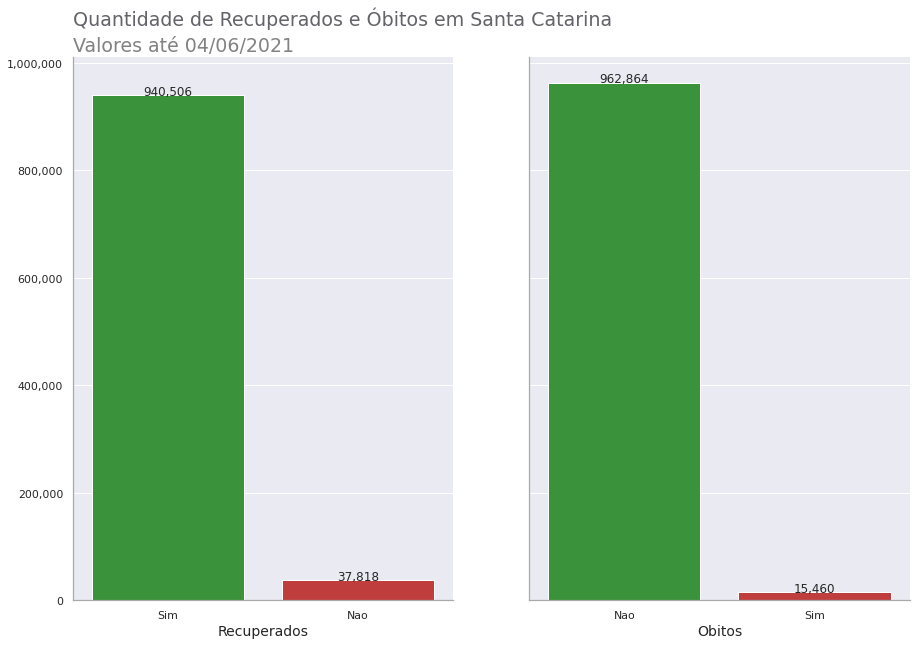

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15,10), sharey = True)
sns.countplot(data = dados_SC, x = 'recuperados', ax=axes[0], palette=['#2CA02C', '#D62728'])
sns.countplot(data = dados_SC, x = 'obito', ax = axes[1], palette=['#2CA02C', '#D62728'])

axes[0].set_ylabel("")
axes[0].set_xlabel('Recuperados', fontsize = 14)
axes[1].set_ylabel("")
axes[1].set_xlabel('Obitos', fontsize = 14)

for ax in axes :
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
  ax.spines['bottom'].set_color('darkgrey')
  ax.spines['left'].set_color('darkgrey')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:,.0f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center")

fig.suptitle('Quantidade de Recuperados e Óbitos em Santa Catarina', fontsize = 19, color = '#646369', x = 0.375, y = 0.95)
axes[0].set_title('Valores até 04/06/2021', loc = 'left', fontsize = 19, color = '#828282')

plt.show()

####**4.1.2 Sexo Biológico e Idades**

Após verificarmos as variáveis de ```recuperados``` e ```obito```, vamos verificar como estão distribuídas as variáveis ```sexo``` e ```idade_categoria```.

Como principal objetivo em nossa análise, iremos focar nos seguintes pontos :
- **Demonstrar os valores absolutos e proporcionais de Total de Casos, Recuperados e Óbitos por categoria de idade.**
- **Demonstrar os valores absolutos de Total de Casos, Recuperados e Óbitos por sexo biológico.**
- **Demonstrar os valores absolutos de Total de Casos, Recuperados e Óbitos por sexo biológico e categoria de idade.**

Para auxiliar em nossa visualização, iremos realizar a criação de uma tabela que indica o tipo (Total / Recuperado / Obito), o valor absoluto e a proporção para cada categoria da nossa coluna ```Idade_Categoria```.

In [22]:
def gera_tabela(tipo) :
  if tipo == 'Total' :
    tabela = pd.DataFrame(dados_SC['idade_categoria'].value_counts().sort_index())
  if tipo == 'Recuperado' :
    tabela = pd.DataFrame(dados_SC.query('recuperados == "Sim"')['idade_categoria'].value_counts().sort_index())
  if tipo == 'Obito' :
    tabela = pd.DataFrame(dados_SC.query('obito == "Sim"')['idade_categoria'].value_counts().sort_index())
  tabela.columns = [f'{tipo}']
  return (tabela)

idade_quantidade = gera_tabela('Total').join(gera_tabela('Recuperado')).join(gera_tabela('Obito'))
idade_quantidade.reset_index(inplace = True)
idade_quantidade.rename(columns = {'index' : 'Idade_Categoria'}, inplace = True)
idade_quantidade = idade_quantidade.melt(id_vars='Idade_Categoria', value_vars=['Total', 'Recuperado', 'Obito'])
idade_quantidade.rename(columns = {'value' : 'Quantidade', 'variable' : 'Tipo'}, inplace = True)

In [23]:
prop_values = pd.Series(dtype = 'float64')
prop_values_total = (idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Total"')['Quantidade'] / idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Total"')['Quantidade']) * 100
prop_values_recuperado = (idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Recuperado"')['Quantidade'] / idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Total"')['Quantidade']) * 100
prop_values_obito = (idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Obito"')['Quantidade'] / idade_quantidade.set_index('Idade_Categoria').query('Tipo == "Total"')['Quantidade']) * 100
prop_values = prop_values.append([prop_values_total, prop_values_recuperado, prop_values_obito])
idade_quantidade['Quantidade_Prop'] = prop_values.values
idade_quantidade.head()

,Idade_Categoria,Tipo,Quantidade,Quantidade_Prop
0,Menos que 20,Total,106218,100.0
1,21-30,Total,202710,100.0
2,31-40,Total,230542,100.0
3,41-50,Total,177778,100.0
4,51-60,Total,135131,100.0


#####**Demonstrar os valores absolutos e proporcionais de Total de Casos, Recuperados e Óbitos por categoria de idade.**

Após realizarmos a criação da tabela, podemos verificar com os gráficos abaixo, como estão distribuídas os números absolutos e as proporções por idade de :
- **Total : Quantidade do grupo que testou positivo para COVID-19.**
- **Recuperado : Quantidade do grupo que se recuperou do COVID-19.**
- **Obito : Quantidade do grupo que veio à óbito após COVID-19.**

Analisando o gráfico, podemos verificar uma maior quantidade de testagem de positivos entre os grupos "**Menos que 20 até 51-60**" que acabam passando de **100.000 positivos**.

É interessante notarmos ao verificar o gráfico de proporções como os grupos de **"71-80"** (**12% dos que testaram positivo foram à óbito**) e "**Maior que 81**" (**22% dos que testaram positivo foram à óbito**) possuem uma taxa de óbito muito maior e consequentemente, menor de recuperados.

O que comprova o quão severo é o COVID-19 para os grupos de idosos.

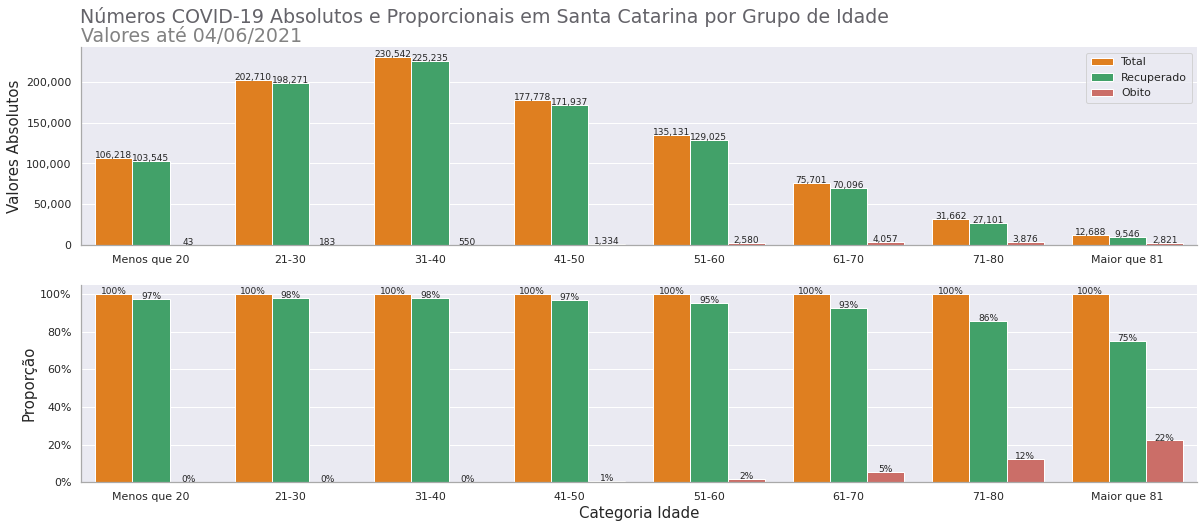

In [24]:
fig, axes = plt.subplots(2, 1, figsize = (20,8))
cores = ['#FF7F00', '#32B166', '#DB5F57']
sns.barplot(data = idade_quantidade, y = 'Quantidade', x = 'Idade_Categoria', hue = 'Tipo', palette = cores, ax = axes[0])
sns.barplot(data = idade_quantidade, y = 'Quantidade_Prop', x = 'Idade_Categoria', hue = 'Tipo', palette = cores, ax = axes[1])

fig.suptitle('Números COVID-19 Absolutos e Proporcionais em Santa Catarina por Grupo de Idade ', fontsize = 19, color = '#646369', x = 0.407, y = 0.95)
axes[0].set_title('Valores até 04/06/2021', loc = 'left', fontsize = 19, color = '#828282')

for index_ax in range(len(axes)) :
  axes[index_ax].spines['bottom'].set_color('darkgrey')
  axes[index_ax].spines['left'].set_color('darkgrey')
  axes[index_ax].spines['right'].set_visible(False)
  axes[index_ax].spines['top'].set_visible(False)
  for p in axes[index_ax].patches :
    if index_ax == 0 :
      value = '{:,.0f}'.format(p.get_height())
    if index_ax == 1 :
      value = '{:,.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() 
    axes[index_ax].text(x, y, value, ha="center", fontsize = 9)

axes[0].set_xlabel("")
axes[1].set_xlabel("Categoria Idade", fontsize = 15)
axes[0].set_ylabel("Valores Absolutos", fontsize = 15)
axes[1].set_ylabel("Proporção", fontsize = 15)
axes[0].legend(bbox_to_anchor = (1, 1))
axes[1].legend_.remove()
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))

plt.show()

#####**Demonstrar os valores absolutos de Total de Casos, Recuperados e Óbitos por sexo biológico.**

Após a verificação da variável ```idade``` vamos identificar como está distribuída a quantidade de valores absolutos em nossa variável ```sexo```.

Como podemos verificar abaixo, possuímos **mais casos confirmados em mulheres (508.285 contra 470.023 em homens)** e **490.574 (96,51% do total de confirmados em mulheres) se recuperaram** do COVID-19 contra **449.916 homens recuperados (95,72% do total)**.

Mesmo com valores menores de casos confirmados para **homens**, podemos verificar no estado de Santa Catarina que é o **sexo que possui mais mortes em valores absolutos** (**8.945 contra 6.515 do sexo feminino**) e proporcional (**1,9%** **do total** contra, aproximadamente, **1,3% do total do sexo feminino**).

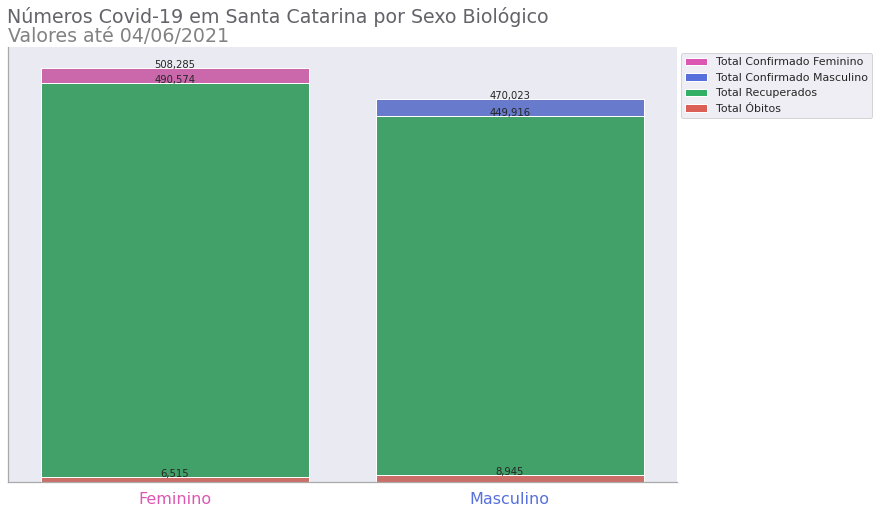

In [25]:
fig, axes = plt.subplots(1, 1, figsize = (12,8))
sns.countplot(data = dados_SC.query('sexo != "NAO INFORMADO"'), x = 'sexo', order = dados_SC.query('sexo != "NAO INFORMADO"')['sexo'].value_counts().index, palette = ['#DB57B2','#5770DB'])
sns.countplot(data = dados_SC.query('sexo != "NAO INFORMADO" and recuperados == "Sim"'), x = 'sexo', color = '#32B166')
sns.countplot(data = dados_SC.query('sexo != "NAO INFORMADO" and obito == "Sim"'), x = 'sexo', color = '#DB5F57', order = dados_SC.query('sexo != "NAO INFORMADO"')['sexo'].value_counts().index)

for p in axes.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  axes.text(_x, _y, value, ha="center", fontsize = 10)

axes.spines['bottom'].set_color('darkgrey')
axes.spines['left'].set_color('darkgrey')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

rect1 = plt.Rectangle((0,0),1,1,facecolor='#DB57B2')
rect2 = plt.Rectangle((0,0),1,1,facecolor='#5770DB')
rect3 = plt.Rectangle((0,0),1,1,facecolor='#32B166')
rect4 = plt.Rectangle((0,0),1,1,facecolor='#DB5F57')

plt.legend((rect1, rect2, rect3, rect4), ('Total Confirmado Feminino', 'Total Confirmado Masculino', 'Total Recuperados', 'Total Óbitos'), bbox_to_anchor = (0.997,1))

fig.suptitle('Números Covid-19 em Santa Catarina por Sexo Biológico', fontsize = 19, color = '#646369', x = 0.438, y = 0.95)
axes.set_title('Valores até 04/06/2021', loc = 'left', fontsize = 19, color = '#828282')

axes.set_ylabel("")
axes.set_xlabel("")
axes.get_xticklabels()[0].set_color('#DB57B2') 
axes.get_xticklabels()[1].set_color('#5770DB') 
axes.tick_params(axis='x', which='major', labelsize=16)
axes.set_yticks([])

plt.show()

#####**Demonstrar os valores absolutos de Total de Casos, Recuperados e Óbitos por sexo biológico e categoria de idade.**

Para isso, irei realizar a criação de uma tabela que separa os valores totais, recuperados e óbitos por sexo e a categoria da idade.

In [26]:
def gera_tabela(tipo) :
  if tipo == 'Total' :
    tabela = pd.DataFrame(dados_SC.query('sexo != "NAO INFORMADO"').groupby(by = ['sexo'])['idade_categoria'].value_counts())
  if tipo == 'Recuperado' :
    tabela = pd.DataFrame(dados_SC.query('sexo != "NAO INFORMADO" and recuperados == "Sim"').groupby(by = ['sexo'])['idade_categoria'].value_counts())
  if tipo == 'Obito' :
    tabela = pd.DataFrame(dados_SC.query('sexo != "NAO INFORMADO" and obito == "Sim"').groupby(by = ['sexo'])['idade_categoria'].value_counts())
  tabela.columns = ['Quantidade']
  tabela.reset_index(inplace = True)
  tabela = tabela.pivot_table(index = 'idade_categoria', values = 'Quantidade', columns = 'sexo')
  tabela.columns = [f'Feminino_{tipo}', f'Masculino_{tipo}']
  return (tabela)

sexo_idade = gera_tabela('Total').join(gera_tabela('Recuperado')).join(gera_tabela('Obito'))
sexo_idade

,Feminino_Total,Masculino_Total,Feminino_Recuperado,Masculino_Recuperado,Feminino_Obito,Masculino_Obito
idade_categoria,,,,,,
Menos que 20,53631,52585,52257,51286,22,21
21-30,106076,96628,103841,94424,93,90
31-40,119563,110976,117025,108207,215,335
41-50,92618,85159,89836,82100,523,811
51-60,70852,64277,68084,60939,1025,1555
61-70,38585,37115,36272,33823,1566,2491
71-80,16561,15100,14564,12536,1646,2230
Maior que 81,7479,5209,5848,3698,1419,1402


Após a criação dessa tabela, iremos realizar a divisão da tabela em outras 2 tabelas :

- **sexo_idade_feminino = Total, Recuperados e Óbitos feminino**
- **sexo_idade_masculino = Total, Recuperados e Óbitos masculino**

In [27]:
def separa_tabela(sexo) :
  tabela = sexo_idade[sexo_idade.columns[sexo_idade.columns.str.contains(f'{sexo}')]]
  tabela.columns = ['Total', 'Recuperado', 'Obito']
  tabela.reset_index(inplace = True)
  tabela = tabela.melt(id_vars='idade_categoria', value_vars = ['Total', 'Recuperado', 'Obito'])
  tabela.rename(columns = {'variable' : 'Tipo', 'value' : 'Quantidade'}, inplace = True)
  return tabela

sexo_idade_feminino = separa_tabela('Feminino')
sexo_idade_masculino = separa_tabela('Masculino')

In [28]:
sexo_idade_feminino.head()

,idade_categoria,Tipo,Quantidade
0,Menos que 20,Total,53631
1,21-30,Total,106076
2,31-40,Total,119563
3,41-50,Total,92618
4,51-60,Total,70852


In [29]:
sexo_idade_masculino.head()

,idade_categoria,Tipo,Quantidade
0,Menos que 20,Total,52585
1,21-30,Total,96628
2,31-40,Total,110976
3,41-50,Total,85159
4,51-60,Total,64277


Com base nessa tabela, conseguimos realizar a criação de um gráfico que demonstra como estão separados os valores absolutos de Totais Confirmados, Recuperados e Óbitos por Covid-19 em cada grupo de idade por sexo biológico.

É interessante notarmos como os valores de **confirmados e recuperados são muito altos** para grupos entre **"Menos que 20"** e **"41-50"**, visto que a defesa imunológica nessa idade é mais alta quando comparada com idades avançadas.

A partir de **51-60**, conseguimos notar tanto para Masculino e Feminino que começa a ocorrer **mais de 1.000 óbitos** e **menos confirmados e recuperados**, o que significa que a **taxa de mortalidade é muito maior para esses grupos**.

Analisando o gráfico, conseguimos notar a **maior taxa de mortalidade** para **homens acima de 81 anos**, com **5.209 confirmados e 1.402 óbitos** (**26% do total foram à óbito**).

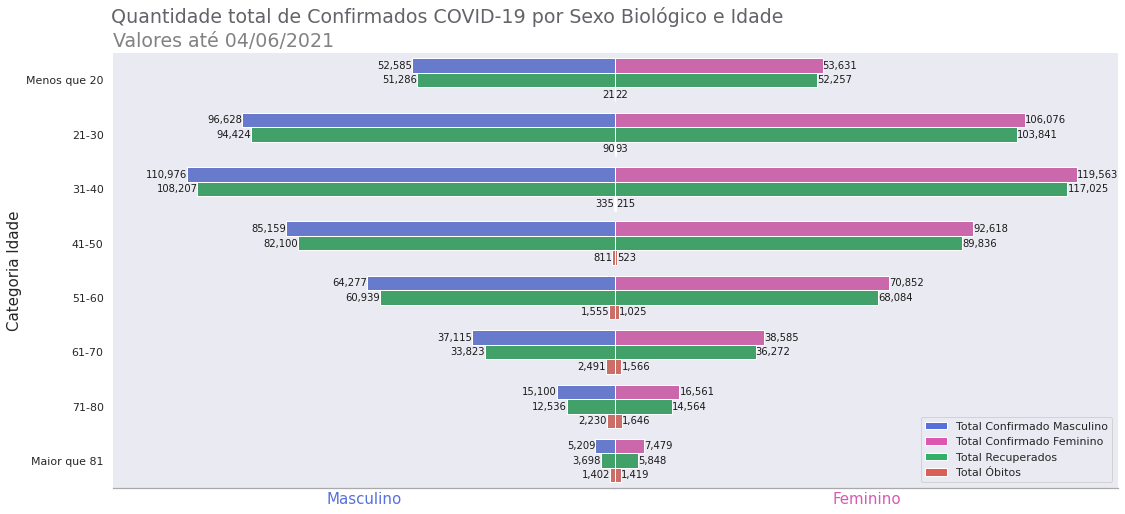

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (18,8), sharey = True)
plt.subplots_adjust(wspace=0, hspace=0)

sns.barplot(data=sexo_idade_masculino, x='Quantidade',y='idade_categoria', orient='horizontal', palette = ['#5770DB', '#32B166', '#DB5F57'], ax = axes[0], hue = 'Tipo')
sns.barplot(data=sexo_idade_feminino, x='Quantidade',y='idade_categoria', orient='horizontal', palette = ['#DB57B2','#32B166', '#DB5F57'], ax = axes[1], hue = 'Tipo')

axes[0].set_xlim(0, 130000)
axes[1].set_xlim(0, 130000)
axes[0].invert_xaxis()
axes[0].set_ylabel("Categoria Idade", fontsize = 15)
axes[1].set_ylabel("")
axes[0].set_xlabel("Masculino", fontsize = 15, color = '#5770DB')
axes[1].set_xlabel("Feminino", fontsize = 15, color = '#DB57B2')
axes[0].legend_.remove()

rect1 = plt.Rectangle((0,0),1,1,facecolor='#5770DB')
rect2 = plt.Rectangle((0,0),1,1,facecolor='#DB57B2')
rect3 = plt.Rectangle((0,0),1,1,facecolor='#32B166')
rect4 = plt.Rectangle((0,0),1,1,facecolor='#DB5F57')
axes[1].legend((rect1, rect2, rect3, rect4), ('Total Confirmado Masculino', 'Total Confirmado Feminino', 'Total Recuperados', 'Total Óbitos'))

for index_ax in range(len(axes)) :
  if index_ax == 0 :
    horizontal = 'right'
    vertical = 'center'
  if index_ax == 1 :
    horizontal = 'left'
    vertical = 'center'
  for p in axes[index_ax].patches :
    width = p.get_width()    
    axes[index_ax].text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}'.format(width), 
            ha = horizontal,   
            va = vertical,
            color = '#1A1A1A',
            fontsize = 10)
    
  axes[index_ax].spines['bottom'].set_color('darkgrey')
  axes[index_ax].spines['left'].set_visible(False)
  axes[index_ax].spines['right'].set_visible(False)
  axes[index_ax].spines['top'].set_visible(False)
  axes[index_ax].set_xticks([])

fig.suptitle('Quantidade total de Confirmados COVID-19 por Sexo Biológico e Idade', fontsize = 19, color = '#646369', x = 0.383, y = 0.96)
axes[0].set_title('Valores até 04/06/2021', loc = 'left', fontsize = 19, color = '#828282')

plt.show()

####**4.1.3 Municipios**

E por fim, iremos realizar a análise da nossa variável "municipio" que corresponde ao município de Santa Catarina que teve o caso confirmado, para essa análise iremos focar nos seguintes pontos :
- **Demonstrar os valores absolutos do Total de Casos Confirmados, Recuperados e Óbitos nos municípios de Santa Catarina (ordenar por maior valor Total e por Óbitos).**
- **Demonstrar os valores proporcionais de Óbitos nos municípios de Santa Catarina (ordenar por maior valor proporcional de Óbitos e verificar a proporção dos municípios vistos anteriormente)**

**OBS** : Visto que as cidades **Flor do Sertão**, **Indaial** e **Novo Horizonte** **não possuem óbitos nos registros**, iremos realizar a **remoção** das mesmas.

In [31]:
municipios = pd.DataFrame()
municipios['Total'] = dados_SC['municipio'].value_counts().sort_index()
municipios['Recuperados'] = dados_SC.query('recuperados == "Sim"').groupby('municipio')['recuperados'].count()
municipios['Obitos'] = dados_SC.query('obito == "Sim"').groupby('municipio')['obito'].count()

In [32]:
municipios.drop(['Flor Do Sertao', 'Indaial ', 'Novo Horizonte'], inplace = True)
municipios['Obitos'] = municipios['Obitos'].astype(int)

In [33]:
municipios.reset_index(inplace = True)
municipios.rename(columns={'index' : 'Municipio'}, inplace = True)
municipios = municipios.melt(id_vars='Municipio', value_vars=['Total', 'Recuperados', 'Obitos']).rename(columns={'variable' : 'Tipo', 'value' : 'Quantidade'})

Para auxiliar em nossa análise, realizei a criação de uma tabela com os valores de cada município com os valores de Total de Casos Confirmados, Recuperados e Óbitos, como podemos verificar abaixo na representação das 5 primeiras linhas :

In [34]:
municipios.head()

,Municipio,Tipo,Quantidade
0,Abdon Batista,Total,372
1,Abelardo Luz,Total,1389
2,Agrolandia,Total,1351
3,Agronomica,Total,595
4,Agua Doce,Total,1156


#####**Demonstrar os valores absolutos do Total de Casos Confirmados, Recuperados e Óbitos nos municípios de Santa Catarina (ordenar por maior valor Total e por Óbitos).**

Conforme podemos verificar abaixo, possuímos as seguintes cidades no top 10 (ordenados por total e obitos) :

```  
Ordenado total             Ordenado por óbito
Joinville                  Joinville
Florianopolis              Florianopolis
Blumenau                   Chapeco
Chapeco                    Itajai
Criciuma                   Sao José
Sao Jose                   Blumenau    
Itajai                     Criciuma
Jaragua do Sul             Lages
Palhoca                    Tubarao
Brusque                    Balneario Camboriu
```

É importante notar que as cidades com maior casos de COVID-19 possuem a maior quantidade de óbitos em valores absolutos, alterando algumas posições na tabela.

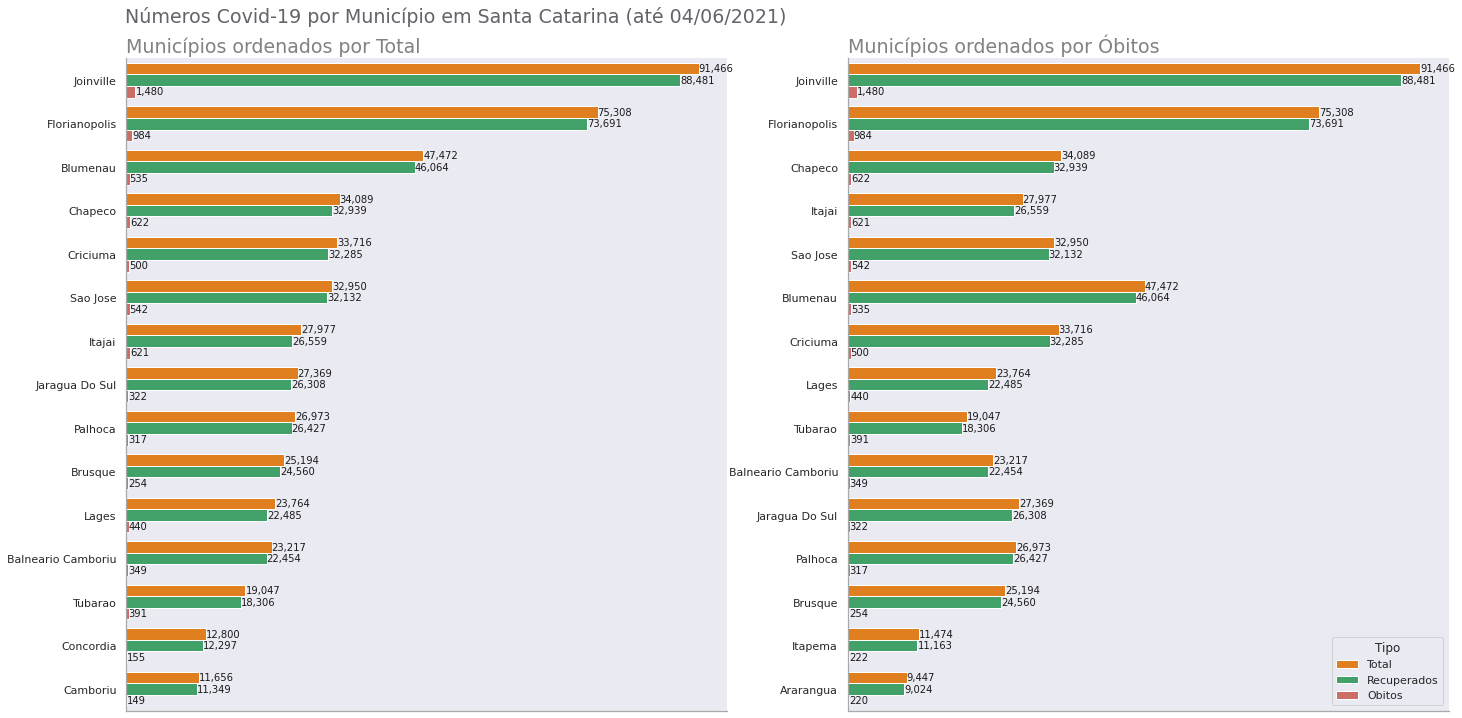

In [35]:
municipios_15 = dados_SC['municipio'].value_counts().sort_values(ascending = False).index[:15]
municipios_15_obito = dados_SC.query('obito == "Sim"')['municipio'].value_counts().sort_values(ascending = False).index[:15]

fig, axes = plt.subplots(1, 2, figsize = (23.7,12))
cores = ['#FF7F00', '#32B166', '#DB5F57']

sns.barplot(data = municipios.query('Municipio in @municipios_15'), x = 'Quantidade', y = 'Municipio', order = municipios_15, hue = 'Tipo', palette = cores, ax = axes[0])
sns.barplot(data = municipios.query('Municipio in @municipios_15_obito'), x = 'Quantidade', y = 'Municipio', order = municipios_15_obito, hue = 'Tipo', palette = cores, ax = axes[1])

for ax in axes :
  for p in ax.patches :
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}'.format(width), 
            ha = horizontal,   
            va = vertical,
            color = '#1A1A1A',
            fontsize = 10)
    ax.set_xticks([])
    ax.set_xlabel("")

    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

axes[1].set_ylabel("")
axes[0].set_ylabel("")
axes[0].legend_.remove()

fig.suptitle('Números Covid-19 por Município em Santa Catarina (até 04/06/2021)', fontsize = 19, color = '#646369', x = 0.318, y = 0.94)
axes[0].set_title('Municípios ordenados por Total', loc = 'left', fontsize = 19, color = '#828282')
axes[1].set_title('Municípios ordenados por Óbitos', loc = 'left', fontsize = 19, color = '#828282')

plt.show()

#####**Demonstrar os valores proporcionais de Óbitos nos municípios de Santa Catarina (ordenar por maior valor proporcional de Óbitos e verificar a proporção dos municípios vistos anteriormente)**

Após a criação da nossa tabela, também iremos adicionar os valores proporcionais por município, onde os tipos ```Total``` recebem o valor de 100%.

**É importante notarmos que as cidades que possuem o maior número de casos e maior número de óbitos não necessariamente possuem a maior quantidade proporcional de óbitos por total.**

In [36]:
municipios_prop = pd.Series(dtype=int)
municipios_prop_total = municipios.set_index('Municipio').query('Tipo == "Total"')['Quantidade'] / municipios.set_index('Municipio').query('Tipo == "Total"')['Quantidade'] * 100
municipios_prop_recuperado = municipios.set_index('Municipio').query('Tipo == "Recuperados"')['Quantidade'] / municipios.set_index('Municipio').query('Tipo == "Total"')['Quantidade'] * 100
municipios_prop_obito = municipios.set_index('Municipio').query('Tipo == "Obitos"')['Quantidade'] / municipios.set_index('Municipio').query('Tipo == "Total"')['Quantidade'] * 100
prop_values = municipios_prop.append([municipios_prop_total, municipios_prop_recuperado, municipios_prop_obito])
municipios['Quantidade_Prop'] = prop_values.values

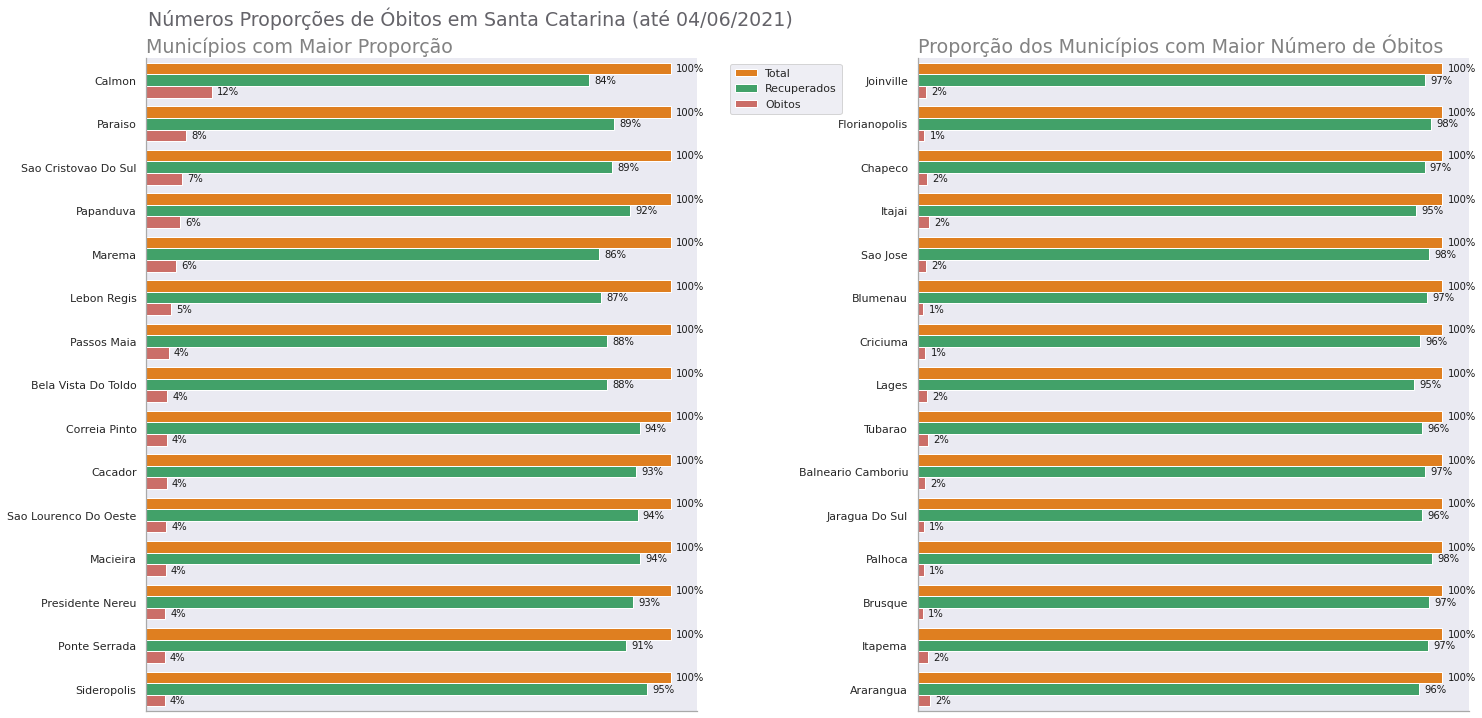

In [37]:
municipios_prop_obitos_15 = municipios.query('Tipo == "Obitos"').sort_values(by = 'Quantidade_Prop', ascending = False)['Municipio'][:15]

fig, axes = plt.subplots(1, 2, figsize = (23.7,12))
plt.subplots_adjust(wspace=0.4)
cores = ['#FF7F00', '#32B166', '#DB5F57']

sns.barplot(data = municipios.query('Municipio in @municipios_prop_obitos_15'), x = 'Quantidade_Prop', y = 'Municipio', order = municipios_prop_obitos_15, hue = 'Tipo', palette = cores, ax = axes[0])
sns.barplot(data = municipios.query('Municipio in @municipios_15_obito'), x = 'Quantidade_Prop', y = 'Municipio', order = municipios_15_obito, hue = 'Tipo', palette = cores, ax = axes[1])

for ax in axes :
  for p in ax.patches :
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}%'.format(width), 
            ha = horizontal,   
            va = vertical,
            color = '#1A1A1A',
            fontsize = 10)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

axes[1].legend_.remove()
axes[0].legend(bbox_to_anchor = (1.05,1))

fig.suptitle('Números Proporções de Óbitos em Santa Catarina (até 04/06/2021)', fontsize = 19, color = '#646369', x = 0.315, y = 0.94)
axes[0].set_title('Municípios com Maior Proporção', loc = 'left', fontsize = 19, color = '#828282')
axes[1].set_title('Proporção dos Municípios com Maior Número de Óbitos', loc = 'left', fontsize = 19, color = '#828282')

plt.show()

###**4.2 Análise Exploratória Datas**

Para essa segunda etapa de exploração, iremos nos concentrar nas variáveis relacionadas as datas, que são ```data_inicio_sintomas```, ```mes_inicio_sintomas``` e ```ano_inicio_sintomas```.

Para traçarmos um objetivo nessa análise, iremos focar nos seguintes pontos : 
- **A evolução dos casos, recuperados e óbitos durante o tempo.**
- **Demonstrar a evolução da soma acumulada.**
- **Verificar em quais meses do ano de 2020 tiveram mais casos absolutos e proporcionais.**

Para auxiliar em nossa análise, iremos realizar a criação de uma tabela que realiza o agrupamento dos valores por data, indo de 25/02/2020 à 30/04/2021.

In [38]:
tabela_data = dados_SC.query("(ano_inicio_sintomas == 2021 and mes_inicio_sintomas not in [5,6]) or ano_inicio_sintomas == 2020").groupby('data_inicio_sintomas').count()
tabela_data['Total'] = tabela_data['recuperados']
tabela_data.drop(['recuperados', 'mes_inicio_sintomas', 'ano_inicio_sintomas', 'sintomas', 'sexo', 'municipio', 'obito', 'idade_categoria'], axis = 1, inplace = True)
tabela_data['Recuperados'] = dados_SC.query("((ano_inicio_sintomas == 2021 and mes_inicio_sintomas not in [5,6]) or ano_inicio_sintomas == 2020) and recuperados == 'Sim'").groupby('data_inicio_sintomas').count()['recuperados']
tabela_data['Recuperados'] = tabela_data['Recuperados'].fillna(0).astype(int)
tabela_data['Obitos'] = dados_SC.query("((ano_inicio_sintomas == 2021 and mes_inicio_sintomas not in [5,6]) or ano_inicio_sintomas == 2020) and obito == 'Sim'").groupby('data_inicio_sintomas').count()['obito']
tabela_data['Obitos'] = tabela_data['Obitos'].fillna(0).astype(int)
tabela_data

,Total,Recuperados,Obitos
data_inicio_sintomas,,,
2020-02-25,13,13,0
2020-02-26,18,18,0
2020-02-27,14,14,0
2020-02-28,21,21,0
2020-02-29,7,7,0
...,...,...,...
2021-04-26,2744,2665,48
2021-04-27,2106,2055,35
2021-04-28,2022,1973,30


#####**Evolução dos casos, recuperados e óbitos durante o tempo**

Conforme podemos verificar abaixo, notamos que os nossos valores de Recuperados acompanha o valor de Total de Confirmados.

Também podemos notar como os gráficos se comportam de maneira muita semelhante se modificando em picos de altas (07/2020, 11/2020 e 03/2021) e baixas.

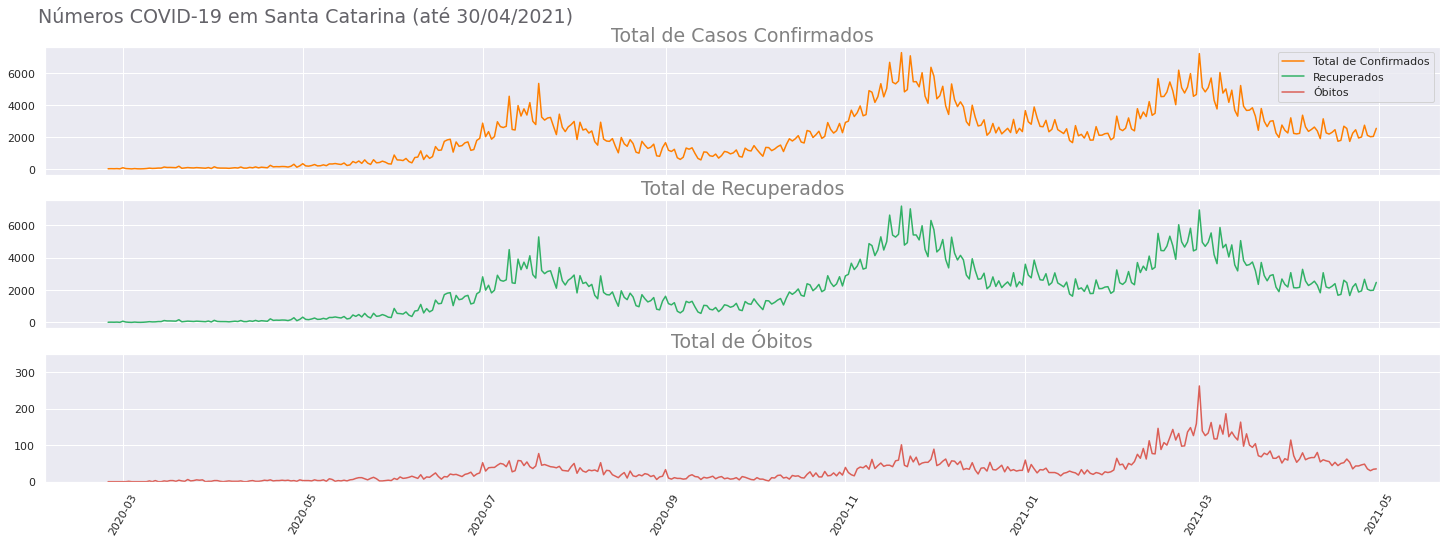

In [39]:
# Armazenar linhas e labels para criação da legenda
lines = []
labels = []

fig, axes = plt.subplots(3,1,figsize = (25,8), sharex = True)
sns.lineplot(data = tabela_data['Total'], ax = axes[0], color = '#FF7F00', label = 'Total de Confirmados')
sns.lineplot(data = tabela_data['Recuperados'], ax = axes[1], color = '#32B166', label = 'Recuperados')
sns.lineplot(data = tabela_data['Obitos'], ax = axes[2], color = '#DB5F57', label = 'Óbitos')

for ax in axes :
  ax.set_ylabel("")
  ax.set_xlabel("")
  lines.extend(ax.get_legend_handles_labels()[0])
  labels.extend(ax.get_legend_handles_labels()[1])
  ax.legend_.remove()
axes[0].legend(lines, labels, loc=0)

axes[2].set_ylim(0,350)
axes[2].yaxis.set_major_locator(ticker.MaxNLocator(4))
axes[2].tick_params(axis='x', labelrotation= 60)

fig.suptitle('Números COVID-19 em Santa Catarina (até 30/04/2021)', fontsize = 19, color = '#646369', x = 0.27, y = 0.95)
axes[0].set_title('Total de Casos Confirmados', loc = 'center', fontsize = 19, color = '#828282')
axes[1].set_title('Total de Recuperados', loc = 'center', fontsize = 19, color = '#828282')
axes[2].set_title('Total de Óbitos', loc = 'center', fontsize = 19, color = '#828282')

plt.show()

####**Demonstrar a evolução da soma acumulada**

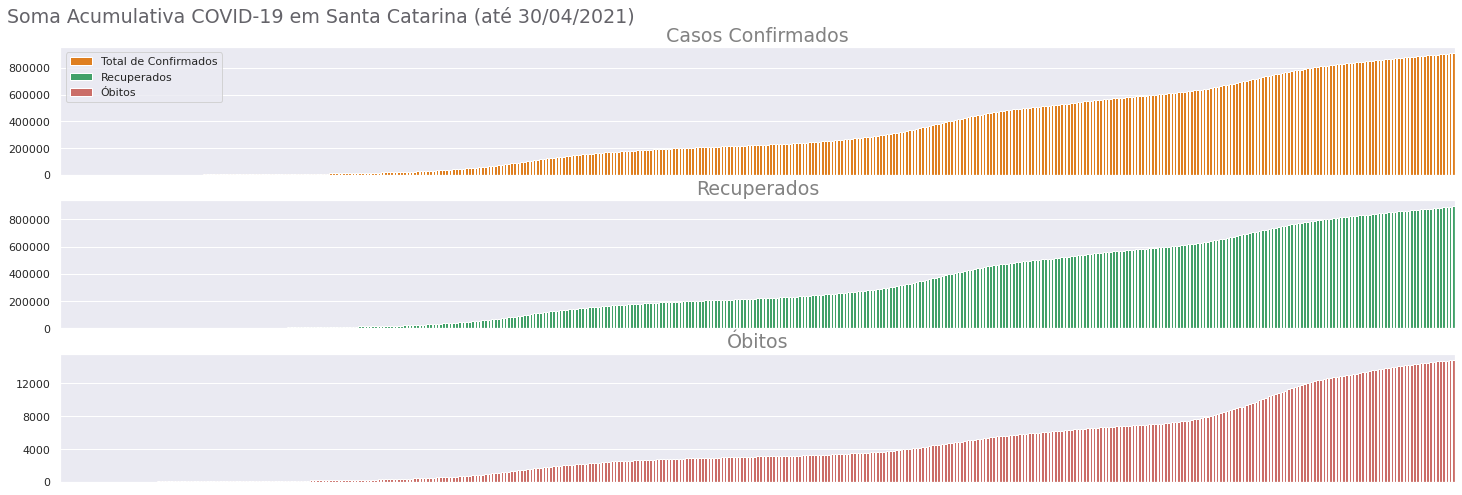

In [40]:
# Armazenar linhas e labels para criação da legenda
lines = []
labels = []

fig, axes = plt.subplots(3,1,figsize = (25,8), sharex = True)
sns.barplot(x = tabela_data.index , y = tabela_data['Total'].cumsum() , color = '#FF7F00', label = 'Total de Confirmados', ax = axes[0])
sns.barplot(x = tabela_data.index , y = tabela_data['Recuperados'].cumsum() , color = '#32B166', label = 'Recuperados', ax = axes[1])
sns.barplot(x = tabela_data.index , y = tabela_data['Obitos'].cumsum(), color = '#DB5F57', label = 'Óbitos', ax = axes[2])

for ax in axes :
  ax.set_ylabel("")
  ax.set_xlabel("")
  lines.extend(ax.get_legend_handles_labels()[0])
  labels.extend(ax.get_legend_handles_labels()[1])
axes[0].legend(lines, labels, loc=0)
axes[2].set_xticks([])
axes[2].yaxis.set_major_locator(ticker.MaxNLocator(4))

fig.suptitle('Soma Acumulativa COVID-19 em Santa Catarina (até 30/04/2021)', fontsize = 19, color = '#646369', x = 0.27, y = 0.95)
axes[0].set_title('Casos Confirmados', loc = 'center', fontsize = 19, color = '#828282')
axes[1].set_title('Recuperados', loc = 'center', fontsize = 19, color = '#828282')
axes[2].set_title('Óbitos', loc = 'center', fontsize = 19, color = '#828282')

plt.show()

#####**Verificar em quais meses do ano de 2020 tiveram mais casos absolutos e proporcionais**

Para responder essa questão, iremos realizar a criação de uma tabela que realiza o agrupamento dos dados por mês e também demonstrar a proporção, sendo Total o valor 100% de cada mês.

In [41]:
tabela_data_mes = dados_SC.query('ano_inicio_sintomas != 2021').groupby('mes_inicio_sintomas').count()

tabela_data_mes['Total'] = tabela_data_mes['recuperados']
tabela_data_mes.drop(['recuperados', 'data_inicio_sintomas', 'ano_inicio_sintomas', 'sintomas', 'sexo', 'municipio', 'obito', 'idade_categoria'], axis = 1, inplace = True)
tabela_data_mes['Recuperados'] = dados_SC.query("ano_inicio_sintomas != 2021 and recuperados == 'Sim'").groupby('mes_inicio_sintomas').count()['recuperados']
tabela_data_mes['Recuperados'] = tabela_data_mes['Recuperados'].fillna(0).astype(int)
tabela_data_mes['Obitos'] = dados_SC.query('ano_inicio_sintomas != 2021 and obito == "Sim"').groupby('mes_inicio_sintomas').count()['obito']
tabela_data_mes['Obitos'] = tabela_data_mes['Obitos'].fillna(0).astype(int)
tabela_data_mes.reset_index(inplace = True)
tabela_data_mes = tabela_data_mes.melt(id_vars = 'mes_inicio_sintomas', value_vars = ['Total', 'Recuperados', 'Obitos'], var_name='Tipo', value_name='Quantidade')

tabela_data_mes_prop = pd.Series(dtype=int)
tabela_data_mes_prop_total = tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Total"')['Quantidade'] / tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Total"')['Quantidade'] * 100
tabela_data_mes_prop_recuperado = tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Recuperados"')['Quantidade'] / tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Total"')['Quantidade'] * 100
tabela_data_mes_prop_obito = tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Obitos"')['Quantidade'] / tabela_data_mes.set_index('mes_inicio_sintomas').query('Tipo == "Total"')['Quantidade'] * 100
prop_values = tabela_data_mes_prop.append([tabela_data_mes_prop_total, tabela_data_mes_prop_recuperado, tabela_data_mes_prop_obito])
tabela_data_mes['Quantidade_Prop'] = prop_values.values

tabela_data_mes.head()

,mes_inicio_sintomas,Tipo,Quantidade,Quantidade_Prop
0,2,Total,73,100.0
1,3,Total,1795,100.0
2,4,Total,3302,100.0
3,5,Total,10295,100.0
4,6,Total,33775,100.0


In [42]:
nome_meses = {1 : 'Jan',
              2 : 'Fev',
              3 : 'Mar',
              4 : 'Abr',
              5 : 'Mai',
              6 : 'Jun',
              7 : 'Jul',
              8 : 'Ago',
              9 : 'Set',
              10 : 'Out',
              11 : 'Nov',
              12 : 'Dez'}

tabela_data_mes['mes_inicio_sintomas'] = tabela_data_mes['mes_inicio_sintomas'].map(nome_meses)

Conforme podemos verificar no gráfico abaixo, podemos identificar que em **Novembro ocorreu o pico de casos absolutos confirmados (144.867) e de óbitos (1.413).**

Podemos verificar que a **maior diferença de valores de casos confirmados foi do mês de Outubro (56.422) para Novembro (144.867)**, onde passamos do dobro.

Também é importante destacar a **constância dos óbitos indicarem 1% do Total de Casos Confirmados por mês.**

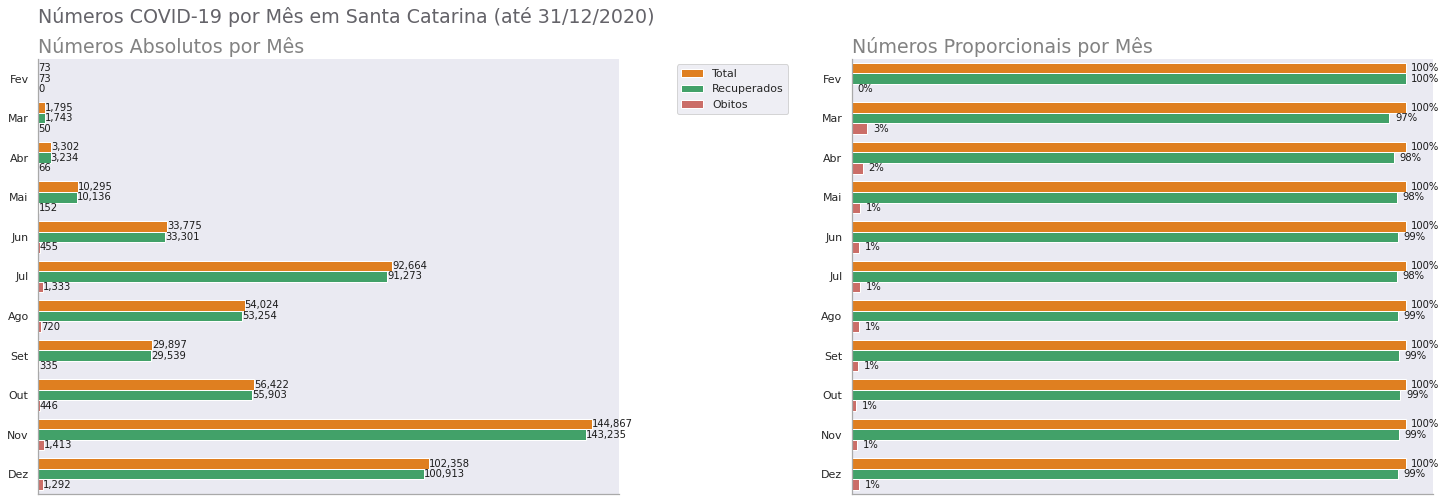

In [43]:
cores = ['#FF7F00', '#32B166', '#DB5F57']
fig, axes = plt.subplots(1, 2, figsize = (25,8))
plt.subplots_adjust(wspace=0.4)
sns.barplot(data = tabela_data_mes, y = 'mes_inicio_sintomas', x = 'Quantidade', hue = 'Tipo', ax = axes[0], palette = cores)
sns.barplot(data = tabela_data_mes, y = 'mes_inicio_sintomas', x = 'Quantidade_Prop', hue = 'Tipo', ax = axes[1], palette = cores)

axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))

for index_ax in range(len(axes)) :
  for p in axes[index_ax].patches :
    width = p.get_width()
    if index_ax == 0 :
      valor = '{:,.0f}'.format(width)
    else :
      valor = '{:,.0f}%'.format(width)
    axes[index_ax].text(width + 1,       
            p.get_y() + p.get_height() / 2,
            s = valor,
            ha = horizontal,   
            va = vertical,
            color = '#1A1A1A',
            fontsize = 10)
    axes[index_ax].spines['bottom'].set_color('darkgrey')
    axes[index_ax].spines['left'].set_color('darkgrey')
    axes[index_ax].spines['right'].set_visible(False)
    axes[index_ax].spines['top'].set_visible(False)
    axes[index_ax].set_xticks([])
    axes[index_ax].set_xlabel("")
    axes[index_ax].set_ylabel("")
    
axes[1].legend_.remove()
axes[0].legend(bbox_to_anchor = (1.3,1))

fig.suptitle('Números COVID-19 por Mês em Santa Catarina (até 31/12/2020)', fontsize = 19, color = '#646369', x = 0.296, y = 0.97)
axes[0].set_title('Números Absolutos por Mês', loc = 'left', fontsize = 19, color = '#828282')
axes[1].set_title('Números Proporcionais por Mês', loc = 'left', fontsize = 19, color = '#828282')

plt.show()

###**4.3 Análise dos Sintomas**

Finalizada a exploração da nossa primeira tabela, iremos realizar a exploração da nossa tabela de sintomas criada anteriormente.

Para a nossa tabela de sintomas, possuimos alguns termos médicos, como **Dispneia**, **Mialgia** e **Cefaleia**, que são entendidos, respectivamente, como **Falta de Ar**, **Dor Muscular** e **Dor de Cabeça**.

Ao criar a nossa tabela, realizamos a divisão da quantidade de cada sintoma em pacientes que se recuperaram e que foram à óbito.

Como objetivo principal da nossa análise para a tabela de sintomas, vamos **verificar os valores absolutos e a % dos sintomas de Total de Confirmados, Recuperados e Óbitos**.

In [44]:
dados_sintomas

,Quantidade_Sem_Obito,Sintoma_Sem_Obito_Por_Pessoa,Quantidade_Com_Obito,Sintoma_Com_Obito_Por_Pessoa,Total
Tosse,434560,65.54,10531,71.38,445091
Febre,315201,47.54,8295,56.22,323496
Dor De Garganta,309571,46.69,3440,23.32,313011
Dispneia,125342,18.90,12916,87.54,138258
Mialgia,121707,18.35,1167,7.91,122874
Cefaleia,89884,13.56,627,4.25,90511
Diarreia,62078,9.36,1986,13.46,64064
Dor No Corpo,53060,8.00,452,3.06,53512
Coriza,47788,7.21,342,2.32,48130
Cansaco,22229,3.35,320,2.17,22549


#####**Valores absolutos e a % dos sintomas de Total de Confirmados, Recuperados e Óbitos**

É importante notarmos ao realizar a verificação do gráfico, que a ordem dos sintomas e a porcentagem(%), seguem o mesmo padrão para o número de Total de Confirmados e Recuperados do COVID-19.

Ao realizar a verificação dos sintomas em pessoas que foram à óbitos, podemos já verificar um aumento expressivo na porcentagem(%) para **Dispneia(Falta de Ar)**, considerado um dos sintomas graves do COVID-19. 

É importante também notarmos que ocorre uma diminuição % (19% para 9%) de Dor de Garganta, um dos sintomas considerados menos comuns e leves.

Para os sintomas de casos totais, podemos verificar que tosse e febre, os sintomas mais comuns da COVID-19 (já comprovados), aparecem, respectivamente, em 1º e 2º lugar dos sintomas mais sentidos.

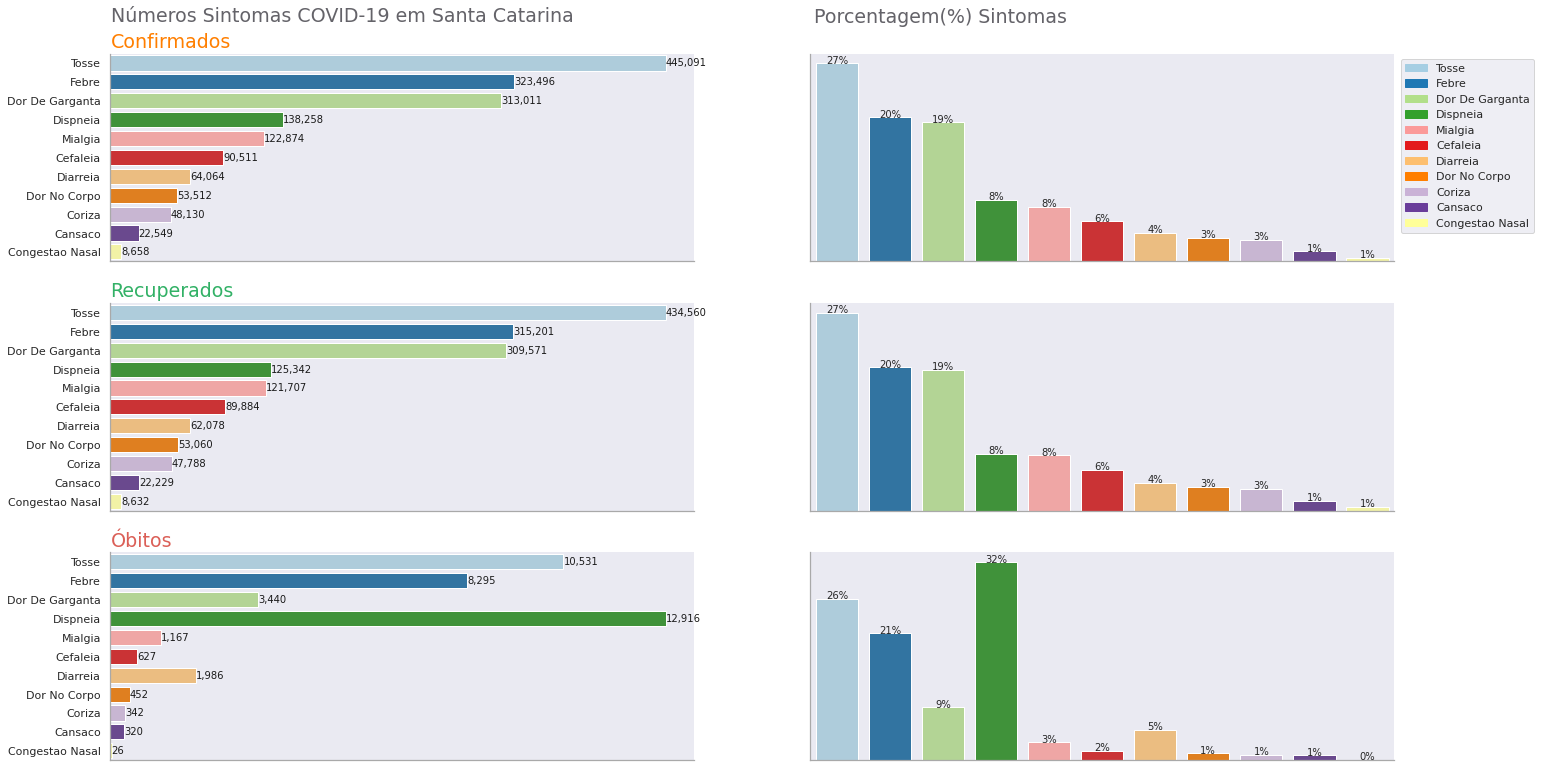

In [45]:
def cria_grafico(Tipo, ax_row, ax_col) :
  
  # Geração dos gráficos da primeira coluna do subplot, demonstrando os valores absolutos.
  if ax_col == 0 :
    sns.barplot(data = dados_sintomas, x = Tipo, y = dados_sintomas.index, palette = palette, ax = axes[ax_row, ax_col])
    axes[ax_row, ax_col].set_xticks([])
    axes[ax_row, ax_col].set_ylabel("")
    axes[ax_row, ax_col].set_xlabel("")
    axes[ax_row, ax_col].set_title(f'{title[ax_row]}', loc = 'left', fontsize = 19, color = cores[ax_row])
    # Inserção dos valores ao lado direito de cada barra
    for p in axes[ax_row, ax_col].patches :
      width = p.get_width()    
      axes[ax_row, ax_col].text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}'.format(width), 
            ha = horizontal,   
            va = vertical,
            color = '#1A1A1A',
            fontsize = 10)
  # Geração dos gráficos da segunda coluna do subplot, demonstrando os valores em porcentagem(%).  
  if ax_col == 1 :
    sns.barplot(data = dados_sintomas, y = (dados_sintomas[Tipo] / dados_sintomas[Tipo].sum() * 100), x = dados_sintomas.index, palette = palette, ax = axes[ax_row, ax_col])
    axes[ax_row, ax_col].set_xticks([])
    axes[ax_row, ax_col].set_ylabel("")
    axes[ax_row, ax_col].set_yticks([])
    axes[ax_row, ax_col].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}%'))
    # Inserção dos valores % acima das barras.
    for p in axes[ax_row, ax_col].patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height()
      value = '{:,.0f}%'.format(p.get_height())
      axes[ax_row, ax_col].text(_x, _y, value, ha="center", fontsize = 10)

  axes[ax_row, ax_col].spines['bottom'].set_color('darkgrey')
  axes[ax_row, ax_col].spines['left'].set_color('darkgrey')
  axes[ax_row, ax_col].spines['right'].set_visible(False)
  axes[ax_row, ax_col].spines['top'].set_visible(False)

fig, axes = plt.subplots(3, 2, figsize=[23,13])
palette = list(sns.color_palette('Paired'))
title = ['Confirmados', 'Recuperados', 'Óbitos']
cores = ['#FF7F00', '#32B166', '#DB5F57']

cria_grafico('Total', 0, 0)
cria_grafico('Total', 0, 1)
cria_grafico('Quantidade_Sem_Obito', 1, 0)
cria_grafico('Quantidade_Sem_Obito', 1, 1)
cria_grafico('Quantidade_Com_Obito', 2, 0)
cria_grafico('Quantidade_Com_Obito', 2, 1)

handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette]
axes[0,1].legend(handles, dados_sintomas.index, loc='upper right', bbox_to_anchor = (1.25,1))
fig.suptitle('Números Sintomas COVID-19 em Santa Catarina', fontsize = 19, color = '#646369', x = 0.265, y = 0.93)
fig.text(s = 'Porcentagem(%) Sintomas', x = 0.55, y = 0.913, fontsize = 19, color = '#646369')

plt.show()

##**5. Criação de Hipóteses**

Ufa! Finalmente realizada essa intensa etapa de análise exploratória dos nossos dados, podemos realizar a formulação de alguns questionamentos para serem respondidos.

Para essa etapa, formulei os seguintes questionamentos :

* **Os municipios que possuem maior número de confirmados também possuem o maior número de óbitos?**
* **Em 2020, no período do inverno possuímos maior número de confirmados e óbitos devido à baixa imunidade?**
* **É possível identificar uma maior proporção de óbitos em algum sexo biológico específico?**
* **Podemos identificar uma maior proporção de óbitos por confirmados em idosos?**
* **Os pacientes que foram à óbito possuiam sintomas diferentes dos que se recuperaram?**

###**5.1 Os municipios que possuem maior número de confirmados também possuem o maior número de óbitos?**

Realizando a análise dos valores absolutos por município de Total de Casos Confirmados e Óbitos por COVID-19, temos como resposta que **sim, municípios que possuem maior número de confirmados possuem o maior número de óbitos**.

Ao realizar a comparação, podemos verificar que 7 municípios estão presentes em ambas listas ordenadas.

```  
Ordem Total de Casos Confirmados         Ordem por Óbitos
Joinville                                Joinville
Florianopolis                            Florianopolis
Blumenau                                 Chapeco
Chapeco                                  Itajai
Criciuma                                 Sao José
Sao Jose                                 Blumenau    
Itajai                                   Criciuma
Jaragua do Sul                           Lages
Palhoca                                  Tubarao
Brusque                                  Balneario Camboriu
```

Porém, é **importante notarmos que ao realizar a comparação por Total de Casos Confirmados e Óbitos por Total de Casos Confirmados (%) vemos que essa premissa não é verdadeira** e possuímos os seguintes municípios com a maior porcentagem(%) :

```
Ordem de maior % de Óbitos por Total de Confirmados
Calmon
Paraiso
Sao Cristovao Do Sul
Papanduva
Marema
Lebon Regis
Passos Maia
Bela Vista Do Toldo
Correia Pinto
Cacador
Sao Lourenco Do Oeste
Macieira
Presidente Nereu
Ponte Serrada
Sideropolis

```

###**5.2 Em 2020, no período do inverno possuímos maior número de confirmados e óbitos devido à baixa imunidade?**

Após a análise exploratória dos dados separados por mês, temos como resposta que **não possuímos uma alta no inverno ou em uma estação específica**.

Conseguimos constatar ao analisar os dados que os meses de **Julho, Novembro e Dezembro** correspondem aos meses que **mais tiveram casos confirmados e óbitos**.

```
Ordem Total de Casos Confirmados          Ordem por Óbitos
Novembro                                  Novembro
Dezembro                                  Julho
Julho                                     Dezembro
Outubro                                   Agosto
Agosto                                    Junho
Junho                                     Outubro
Setembro                                  Setembro
Maio                                      Maio
Abril                                     Abril
Março                                     Março
Fevereiro                                 Fevereiro
```

A explicação para esses números se baseiam no conceito de "**ondas**", um conceito constantemente utilizado para **contextualizar o comportamento da pandemia**. Segundo o pesquisador José Eduardo Levi, da Universidade de São Paulo (USP), o **surgimento** de uma onda pode ser caracterizado quando ocorre um **aumento progessivo de casos**. E após esse movimento de crescente, o **movimento natural é que a escalada nos índices atinja um pico**, **permaneça estabilizado por um tempo e então comece a descer, finalizando assim uma onda**.
  
Fonte : [30/05/2021 - CNN Brasil - O que são ondas da COVID-19 e por que o brasil pode estar diante da 3](https://www.cnnbrasil.com.br/saude/2021/05/30/o-que-sao-ondas-da-covid-19-e-por-que-o-brasil-pode-estar-diante-da-3)

Para o estado de Santa Catarina a **primeira onda teria sido em Março**, quando foram notificados os primeiros casos. **A segunda em Julho**, quando o quadro da doença se agravou no Estado. **E a terceira durante o mês de Outubro**. 

Fonte : [26/10/2020 - NDMais - Santa Catarina enfrenta nova onda da COVID-19](https://ndmais.com.br/saude/santa-catarina-enfrenta-nova-onda-da-covid-19-entenda/)

###**5.3 É possível identificar uma maior proporção de óbitos em algum sexo biológico específico?**

Após verificação dos valores por Sexo Biológico, chegamos a conclusão que é possível identificar uma maior proporção de óbitos para indivíduos do sexo masculino.

Verificando os casos, identificamos **mais casos confirmados em mulheres (508.285 contra 470.023 em homens)** e **490.574 (96,51% do total de confirmados em mulheres) se recuperaram** do COVID-19 contra **449.916 homens recuperados (95,72% do total)**.

Mesmo com valores menores de casos confirmados para **homens**, podemos verificar no estado de Santa Catarina que é o **sexo que possui mais mortes em valores absolutos** (**8.945 contra 6.515 do sexo feminino**) e proporcional (**1,9%** **do total** contra, aproximadamente, **1,3% do total do sexo feminino**).

Caso você tenha interesse, podes verificar essa [matéria da UOL](https://www.uol.com.br/vivabem/noticias/redacao/2020/08/26/covid-19-maior-mortalidade-masculina-e-explicada-por-imunidade-diz-estudo.html) referente à maior mortalidade masculina decorrente do COVID-19.

###**5.4 Podemos identificar uma maior proporção de óbitos em idosos?**

Sim! Ao realizarmos a análise dos dados referente à idade, conseguimos verificar um **aumento considerável na porcentagem (%) de pacientes que foram à óbito para os grupos maiores que 60 anos**, sendo :
- 61-70 anos (5% do Total de Positivos foram à óbito)
- 71-80 anos (12% do Total de Positivos foram à óbito)
- Maior que 81 (22% do Total de Positivos foram à óbito)

A explicação para essa **maior proporção de óbitos em idosos** se deve a **maior fragilidade do sistema imunológico** (menos anticorpos no organismo), que traz uma **dificuldade em enfrentar diversos tipos de doenças**.

Somado à essas características naturais temos o fato de que os pulmões e as mucosas dos idosos se tornam mais frágeis e mais suscetíveis a doenças virais (como o COVID-19). 

Também sabemos que o **público dessa faixa etária vai ao hospital com mais frequência, o que aumenta o tempo de exposição a ambientes com micro-organismos e possuem um número maior de comorbidades** (diabetes, hipertensão, doenças cardíacas ou pulmonares), aumentando assim a chance de possuir um quadro grave se forem contaminados.

Fonte : [Medprev - Por que o organismo dos idosos é mais suscetível à Covid-19 e outras doenças?](https://medprev.online/blog/doencas/organismo-do-idoso-covid-19/)

###**5.5 Os pacientes que foram à óbito possuiam sintomas diferentes dos que se recuperaram?**

Os pacientes **não possuiam sintomas diferentes**, mas **possuiam uma porcentagem(%) maior para alguns sintomas**! 

Realizando a análise da tabela dos nossos sintomas, verificamos que ocorre um **grande aumento na porcentagem(%) para Dispneia (Falta de Ar)**, um dos sintomas graves causados pelo COVID-19, aos pacientes que foram a óbito. 

É importante também notarmos que ocorre uma **diminuição na porcentagem (19% para 9%) de Dor de Garganta**, um dos sintomas considerados menos comuns e leves.

##**6. Conclusão**

Esse projeto foi muito interessante para a visualização de como está sendo o período de pandemia em meu estado (Santa Catarina) além de desenvolver novas habilidades para a área de análise de dados.

Com a Análise Exploratória, conseguimos identificar as chamadas "ondas" (movimento de crescente, estabilização e diminuição dos números da pandemia) e verificamos que o Total de Confirmados, Recuperados e Óbitos seguem o mesmo padrão.

Também foi interessante validarmos que o público masculino e grupos acima de 60 anos possuem % maiores para a taxa de óbito por COVID-19.

Verificamos também que ocorre um aumento considerado na % de Dispneia (Falta de Ar) para os pacientes que foram à óbito, sendo o sintoma mais recorrente.